In [16]:
import numpy as np
import matplotlib.pyplot as plt

#parameters
k_features=100
n_users=943
n_movies=1682

iterations=200
learning_rate=0.000001
beta=0.002

P_train=np.random.rand(n_users,k_features)
Q_train=np.random.rand(n_movies,k_features)

#load data
def load_data(path):
    R_label = np.zeros((n_users, n_movies))
    f = open(path)
    for line in f.readlines():
        [user,movie,score,_] = line.strip().split("\t")
        R_label[int(user)-1,int(movie)-1]=int(score)
    return R_label

R_train=load_data("./ml-100k/u5.base")
R_validation=load_data("./ml-100k/u5.test")

print(R_train.shape)
print(R_validation.shape)

(943, 1682)
(943, 1682)


In [17]:
#train
loss_train=np.zeros((iterations,1))
loss_validation=np.zeros((iterations,1))

for iter in range(iterations):

    #calculation  gradient
    error_train=R_train - P_train.dot(Q_train.T)
    
    P_gradient = - error_train.dot(Q_train)+beta*P_train
    Q_gradient = - error_train.T.dot(P_train)+beta*Q_train
    P_train = P_train - learning_rate * P_gradient
    Q_train = Q_train - learning_rate * Q_gradient
    
    
    L2=beta*(np.sum(np.multiply(Q_train,Q_train))+np.sum(np.multiply(P_train,P_train)))
    loss_train[iter] = np.sum(np.square(error_train)) + L2

    #validation
    error_validation = R_validation - P_train.dot(Q_train.T)
    loss_validation[iter] = np.sum(np.square(error_validation))+ L2


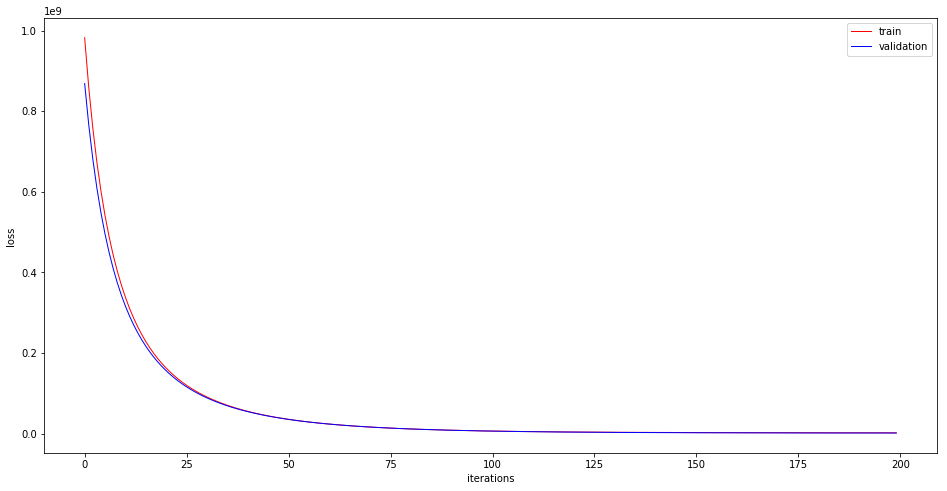

In [18]:
plt.figure(figsize=(16,8))
plt.xlabel('iterations')
plt.ylabel('loss ')

plt.plot(range(iterations), loss_train,color = 'r',linewidth=1,linestyle='-',label='train')
plt.plot(range(iterations), loss_validation,color = 'b',linewidth=1,linestyle='-',label='validation')
plt.legend(loc='upper right')

#plt.savefig("loss.png")#保存图像
plt.show()#显示图像